In [1]:
import pywt

import MyEDFImports as m
import numpy as np
import matplotlib.pyplot as plt
import neurokit2

In [2]:
data = m.load_all_data()
labels = m.load_all_labels()
data.shape

Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CN223100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CX230050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/DG220020.edf...
EDF file detected
Setting chann

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:42: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/DO223050.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LA216100.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/LM230010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /home/tadeusz/Desktop/Tadeusz/mgr_sleep_

/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/MyEDFImports.py:42: RuntimeWarning: Channel names are not unique, found duplicates for: {'CHIN EMG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path + "//" + name)


<RawEDF | CN223100.edf, 1 x 15611000 (31222.0 s), ~6 kB, data not loaded> with 1561 windows
<RawEDF | CP229110.edf, 1 x 20078000 (40156.0 s), ~6 kB, data not loaded> with 2007 windows
importing inverted file: CP229110.edf
/home/tadeusz/Desktop/Tadeusz/mgr_sleep_states/Jean-Pol_repaired_headers/CP229110.edf
<RawEDF | CX230050.edf, 1 x 17981000 (35962.0 s), ~6 kB, data not loaded> with 1798 windows
<RawEDF | DG220020.edf, 1 x 17756000 (35512.0 s), ~6 kB, data not loaded> with 1775 windows
<RawEDF | DO223050.edf, 1 x 18066500 (36133.0 s), ~6 kB, data not loaded> with 1806 windows
<RawEDF | LA216100.edf, 1 x 16333500 (32667.0 s), ~6 kB, data not loaded> with 1633 windows
<RawEDF | LM230010.edf, 1 x 17246500 (34493.0 s), ~6 kB, data not loaded> with 1724 windows
<RawEDF | TK221110.edf, 1 x 15991000 (31982.0 s), ~6 kB, data not loaded> with 1599 windows
<RawEDF | VC209100.edf, 1 x 18434500 (36869.0 s), ~6 kB, data not loaded> with 1843 windows
<RawEDF | VP214110.edf, 1 x 17252500 (34505.0 s)

(19248, 10000)

In [3]:
def remove_from_data(data, mask):
    assert len(data) == len(mask)
    if type(data) == np.ndarray:
        mask = np.array(mask)
        return data[mask]
    if type(data) == list:
        return [a for a, b in zip(data, mask) if b == True]


In [14]:
def make_wide_windows(datapoints,labels, win_pad=1):
    labels = labels[win_pad:-win_pad]
    n_wide_points = datapoints.shape[0] - win_pad * 2
    wide_window_len = (2*win_pad + 1) * datapoints.shape[1]
    data_wide = np.zeros(shape=(n_wide_points, wide_window_len))
    for i in range(win_pad, (len(data_wide) + win_pad)):
        if i + 1 % 300 == 0:
            print(i + 1)
        wide_win = np.concatenate(datapoints[i - win_pad:i + win_pad + 1])
        data_wide[i - win_pad] = wide_win
    return data_wide, labels

In [5]:
def get_r_peaks(data):
    r_peaks_wide = []
    for d in data:
        try:
            new_peaks = neurokit2.ecg_peaks(d, sampling_rate=500)[1]['ECG_R_Peaks']
            r_peaks_wide.append(new_peaks)
        except:
            r_peaks_wide.append([])
    return r_peaks_wide

In [8]:
#if detected bpm is less than 30 sth is off
#most commoom beat is one every seconde if there is less than
def where_not_30bpm(peaks_list, len_data):
    nr_seconds = len_data / 500
    where_less_than_half = np.array([len(p) > (nr_seconds / 2) for p in peaks_list])
    prcnt_discarded = sum(where_less_than_half) / len(where_less_than_half)

    print(prcnt_discarded * 100)
    return where_less_than_half

In [15]:
data_wide, labels_wide= make_wide_windows(data, labels)
r_peaks_wide = get_r_peaks(data_wide)

/home/tadeusz/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tadeusz/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
len(data_wide)

19246

In [19]:
where_more_than_30bpm = where_not_30bpm(r_peaks_wide, len_data=data_wide.shape[1])
# removing bad data from datapoints, labels and peaks
data_filtered = remove_from_data(data_wide, where_more_than_30bpm)
labels_filtered = remove_from_data(labels_wide, where_more_than_30bpm)
r_peaks_filtered = remove_from_data(r_peaks_wide, where_more_than_30bpm)
# calculating differences
r_peaks_diffs = [np.diff(d) for d in r_peaks_filtered]
assert(len(r_peaks_diffs) == len(labels_filtered))

99.58952509612386


In [25]:
def calculate_cwt(data, scales = np.arange(1,100)):
    wavelet = 'cmor'
    coef_p, freq_p = pywt.cwt(data, scales, wavelet)
    abs_coefs = np.abs(coef_p)
    return abs_coefs


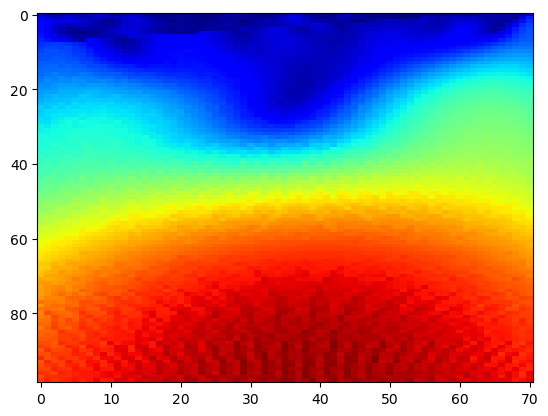

In [31]:
ex = r_peaks_diffs[1800]
s = np.arange(1,100)
ex_cwt = calculate_cwt(ex, s)

plt.imshow(ex_cwt, cmap='jet', aspect='auto',
               vmax=abs(ex_cwt).max(), )

In [ ]:
sus = data_wide[17006]
plt.plot(sus)
plt.plot(ex_cleaned)
sus_peaks = neurokit2.ecg_peaks(ex_cleaned[:15000], sampling_rate=500)
sus_peaks

In [ ]:
noise = np.concatenate(data[17001:17026])
plt.plot(noise)
plt.plot(data[110])

In [ ]:
sus_peaks = neurokit2.ecg_peaks(ex_cleaned[:10000])

In [ ]:
def plot_with_peaks(y, r_peaks, detector_name='nodetect', sampling_freq=500):
    # convert sample to nr to time
    r_ts = np.array(r_peaks) / sampling_freq
    # plotting
    plt.figure()
    t = np.linspace(0, len(y) / sampling_freq, len(y))
    plt.plot(t, y)
    plt.plot(r_ts, y[r_peaks], 'ro')
    plt.title(f"{detector_name}")
    plt.ylabel("ECG/mV")
    plt.xlabel("time/sec")
    plt.show()

In [ ]:
ex_data = data_wide[100]
ex = neurokit2.ecg_peaks(ex_data, sampling_rate=500)[1]['ECG_R_Peaks']
plot_with_peaks(ex_data, ex)